In [8]:
import pickle
import numpy as np

In [9]:
X = pickle.load(open('X.pk1', 'rb'))
Y = pickle.load(open('Y.pk1', 'rb'))

In [10]:
Y

array([0, 1, 1, ..., 0, 3, 4])

In [11]:
X

array([[[[174, 174, 186],
         [175, 175, 187],
         [175, 175, 187],
         ...,
         [140, 141, 151],
         [162, 166, 177],
         [168, 172, 183]],

        [[176, 176, 188],
         [173, 173, 185],
         [173, 173, 185],
         ...,
         [150, 150, 161],
         [167, 170, 181],
         [168, 172, 183]],

        [[170, 170, 182],
         [174, 174, 186],
         [181, 181, 193],
         ...,
         [171, 171, 182],
         [175, 178, 189],
         [172, 176, 187]],

        ...,

        [[ 11,   1,   1],
         [ 11,   1,   1],
         [ 11,   1,   1],
         ...,
         [ 29,  12,   0],
         [ 30,  14,   1],
         [ 33,  17,   2]],

        [[ 11,   1,   1],
         [ 11,   1,   1],
         [ 11,   1,   1],
         ...,
         [ 29,  12,   1],
         [ 28,  12,   0],
         [ 32,  15,   0]],

        [[ 11,   1,   1],
         [ 11,   1,   1],
         [ 11,   1,   1],
         ...,
         [ 30,  13,   2],
        

In [12]:
X = X/255

In [13]:
X

array([[[[0.68235294, 0.68235294, 0.72941176],
         [0.68627451, 0.68627451, 0.73333333],
         [0.68627451, 0.68627451, 0.73333333],
         ...,
         [0.54901961, 0.55294118, 0.59215686],
         [0.63529412, 0.65098039, 0.69411765],
         [0.65882353, 0.6745098 , 0.71764706]],

        [[0.69019608, 0.69019608, 0.7372549 ],
         [0.67843137, 0.67843137, 0.7254902 ],
         [0.67843137, 0.67843137, 0.7254902 ],
         ...,
         [0.58823529, 0.58823529, 0.63137255],
         [0.65490196, 0.66666667, 0.70980392],
         [0.65882353, 0.6745098 , 0.71764706]],

        [[0.66666667, 0.66666667, 0.71372549],
         [0.68235294, 0.68235294, 0.72941176],
         [0.70980392, 0.70980392, 0.75686275],
         ...,
         [0.67058824, 0.67058824, 0.71372549],
         [0.68627451, 0.69803922, 0.74117647],
         [0.6745098 , 0.69019608, 0.73333333]],

        ...,

        [[0.04313725, 0.00392157, 0.00392157],
         [0.04313725, 0.00392157, 0.00392157]

In [14]:
X.shape

(1944, 224, 224, 3)

In [15]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [16]:
model = Sequential()

model.add(Conv2D(64,(3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, input_shape=X.shape[1:], activation = "relu"))

model.add(Dense(5, activation="softmax"))

In [17]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"] )

In [18]:
model.fit(X,Y, epochs=10,validation_split=0.2,batch_size=64)

Epoch 1/10


25/25 [==============================] - 50s 2s/step - loss: 2.6048 - accuracy: 0.4489 - val_loss: 1.2068 - val_accuracy: 0.5424
Epoch 2/10
25/25 [==============================] - 45s 2s/step - loss: 1.0802 - accuracy: 0.5981 - val_loss: 0.9744 - val_accuracy: 0.6298
Epoch 3/10
25/25 [==============================] - 45s 2s/step - loss: 0.7504 - accuracy: 0.7260 - val_loss: 1.1237 - val_accuracy: 0.6144
Epoch 4/10
25/25 [==============================] - 45s 2s/step - loss: 0.5074 - accuracy: 0.8302 - val_loss: 1.0886 - val_accuracy: 0.6324
Epoch 5/10
25/25 [==============================] - 45s 2s/step - loss: 0.3293 - accuracy: 0.8939 - val_loss: 1.0656 - val_accuracy: 0.6735
Epoch 6/10
25/25 [==============================] - 45s 2s/step - loss: 0.2220 - accuracy: 0.9312 - val_loss: 1.0822 - val_accuracy: 0.7018
Epoch 7/10
25/25 [==============================] - 45s 2s/step - loss: 0.1395 - accuracy: 0.9640 - val_loss: 1.2913 - val_accuracy: 0.6992
Epoch 8/10
25/25 [

In [19]:
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
# import gradio as gr

test_folder = 'C:/Full/Path/To/Dataset/train/test'

files = os.listdir(test_folder)
# class_name = ['Bear', 'Cheetah', 'Leopard', 'Lion', 'Zebra']

In [20]:
# def predict_image(img):
#     resized_img = cv2.resize(img, (224, 224))
#     img_3D=img.reshape(-1,224,224,3)
#     prediction=model.predict(img_3D)[0]
#     return {class_name[i]:float(prediction[i]) for i in range (5)}


In [21]:
# image = gr.Image()
# label = gr.Label(num_top_classes=5)

# gr.Interface(fn=predict_image, inputs=image,outputs=label).launch(debug="True")

1/1 [==============================] - 0s 72ms/step


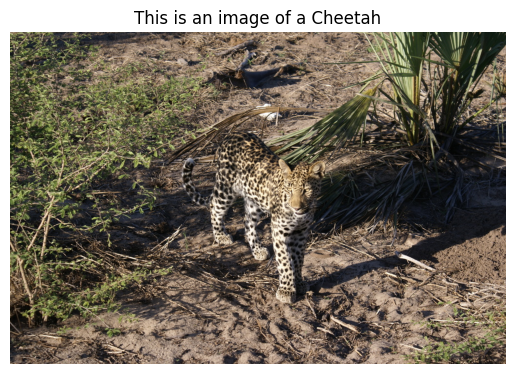

In [33]:
random_image = random.choice(files)
image_path = os.path.join(test_folder, random_image)
image_path2 = r"C:/Full/Path/To/Dataset/train/test/polar_bear99.jpg"
new_image = cv2.imread(image_path)
new_image_resized = cv2.resize(new_image, (224, 224))
new_image_resized = np.expand_dims(new_image_resized, axis=0)
new_image_resized = new_image_resized / 255.0

predictions = model.predict(new_image_resized)

predicted_class_index = np.argmax(predictions)

class_labels = ['Bear', 'Cheetah', 'Leopard', 'Lion', 'Zebra']

predicted_class_label = class_labels[predicted_class_index]

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(f'This is an image of a {predicted_class_label}')
plt.show()